In [13]:
import numpy as np
import matplotlib.pyplot as plt
from math import ceil

def frange(start, stop, step):
    i = start
    while i < stop:
        yield i
        i += step
        
t = [x for x in frange(0, 1000, 1)]


def reverseArray(a):
    b = []
    lena = len(a)
    for i in range(lena):
        b.append(a[lena-i - 1])
    
    return b

def applyF(f, i):
    o = []
    for x in i:
        o.append(float(f(x)))
    return o

def plotF(f):
    plt.plot(t, applyF(f, t))  
    plt.grid(True)  
    plt.show()

def padArray(array, padSize):
    output = [0 for i in range(padSize)]
    for i in array:
        output.append(i)
        
    output = output + [0 for i in range(padSize)]
    
    return output

def reverseArray(a):
    b = []
    lena = len(a)
    for i in range(lena):
        b.append(a[lena-i - 1])
    
    return b

def discreteCorrelation(g, h):
    f = []
    hLen = len(h)
    padSize = len(h) - 1
    convolvedLen = len(g) + 2*len(h) - 2
    g = padArray(g, padSize)
    for i in range(padSize, convolvedLen):
        sum0 = 0
        for j in range(hLen):
            index = i + j - hLen + 1
            try:
                sum0 = sum0 + g[index]*h[j]
            except:
                print index, convolvedLen
                return f
        f.append(sum0)
    
    return f    

def discreteConvolution(g, h):
    f = []
    h = reverseArray(h)
    hLen = len(h)
    padSize = len(h) - 1
    convolvedLen = len(g) + 2*len(h) - 2
    g = padArray(g, padSize)
    for i in range(padSize, convolvedLen):
        sum0 = 0
        for j in range(hLen):
            index = i + j - hLen + 1
            try:
                sum0 = sum0 + g[index]*h[j]
            except:
                print index, convolvedLen
                return f
        f.append(sum0)
    
    return f

In [2]:
h = [1, -1, 2]
g = [0, 1,2,3,4]
print discreteConvolution(g, h)

3
9
[0, 1, 1, 3, 5, 2, 8]


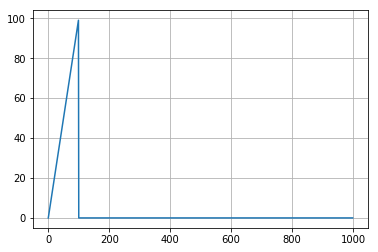

In [3]:
# signal samples ramp

def ramp(x):
    return x if x > 0 and x < 100 else 0  

plotF(ramp)

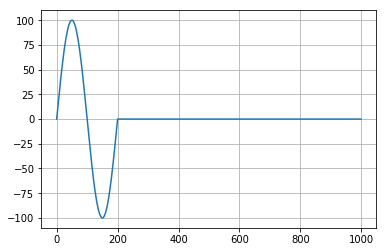

In [4]:
def sin(x):
    return np.sin(x*np.pi*1/100) * 100 if x < 200 and x > 0 else 0

plotF(sin)

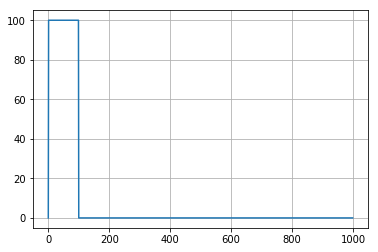

In [5]:
def plato (x): 
    return 100 if x > 0 and x < 100 else 0  

plotF(plato)

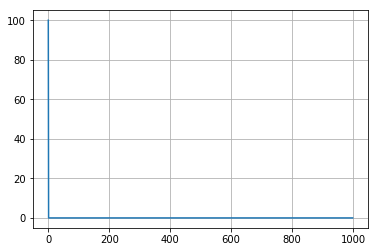

In [6]:
def pulse (x):
    return 100 if x == 0 else 0  

plotF(pulse)    

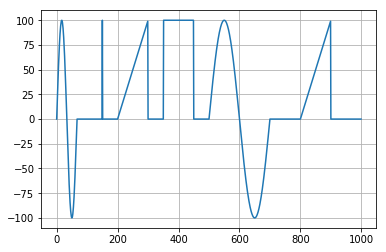

In [7]:
composedSignal = lambda x: ramp(x-200) + sin(3*x) + sin(x - 500) + ramp(x-800) + plato(x-350) + pulse(x-150)
   
plotF(composedSignal)

100
1198


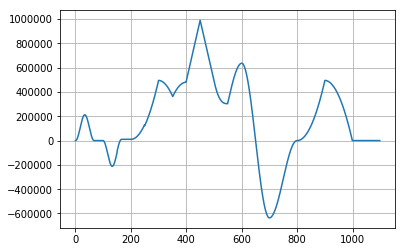

In [8]:
signalArray = applyF(composedSignal, t)
platoArray = applyF(plato, t)

convolutedPoints = discreteConvolution(signalArray, platoArray[:100])
plt.plot([x for x in frange(0, len(convolutedPoints), 1)], convolutedPoints)  
plt.grid(True)  
plt.show()

100
1198


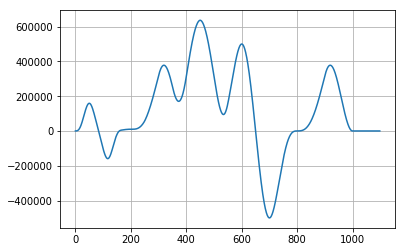

In [9]:
signalArray = applyF(composedSignal, t)
platoArray = applyF(sin, t)

convolutedPoints = discreteConvolution(signalArray, platoArray[:100])
plt.plot([x for x in frange(0, len(convolutedPoints), 1)], convolutedPoints)  
plt.grid(True)  
plt.show()

100
1198


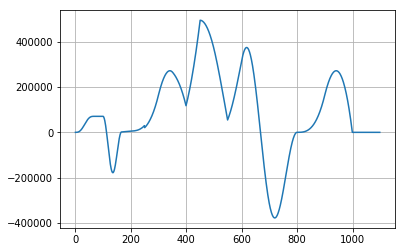

In [10]:
signalArray = applyF(composedSignal, t)
platoArray = applyF(ramp, t)

convolutedPoints = discreteConvolution(signalArray, platoArray[:100])
plt.plot([x for x in frange(0, len(convolutedPoints), 1)], convolutedPoints)  
plt.grid(True)  
plt.show()

100
1198


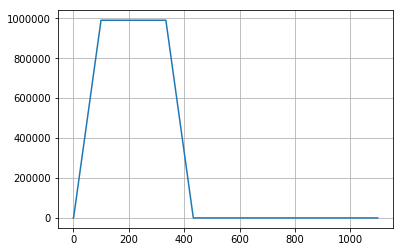

In [11]:
signal = lambda x: plato(.3*x)
platoArray = applyF(plato, t)
signalArray = applyF(signal, t)

convolutedPoints = discreteConvolution(signalArray, platoArray[:100])
plt.plot([x for x in frange(0, len(convolutedPoints), 1)], convolutedPoints)  
plt.grid(True)  
plt.show()

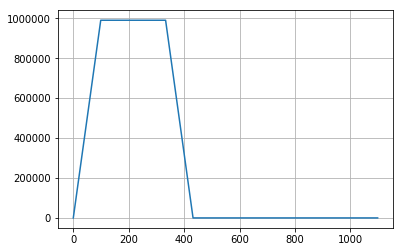

In [15]:
signal = lambda x: plato(.3*x)
platoArray = applyF(plato, t)
signalArray = applyF(signal, t)

convolutedPoints = discreteCorrelation(signalArray, platoArray[:100])
plt.plot([x for x in frange(0, len(convolutedPoints), 1)], convolutedPoints)  
plt.grid(True)  
plt.show()

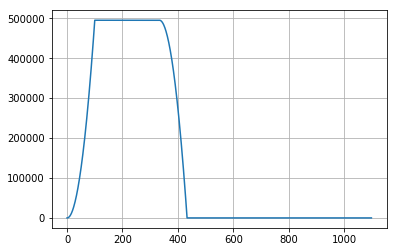

In [18]:
signal = lambda x: plato(.3*x)
platoArray = applyF(ramp, t)
signalArray = applyF(signal, t)

convolutedPoints = discreteConvolution(signalArray, platoArray[:100])
plt.plot([x for x in frange(0, len(convolutedPoints), 1)], convolutedPoints)  
plt.grid(True)  
plt.show()

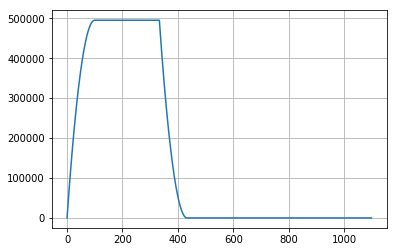

In [17]:
signal = lambda x: plato(.3*x)
platoArray = applyF(ramp, t)
signalArray = applyF(signal, t)

convolutedPoints = discreteCorrelation(signalArray, platoArray[:100])
plt.plot([x for x in frange(0, len(convolutedPoints), 1)], convolutedPoints)  
plt.grid(True)  
plt.show()